In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('/content/vehicle_emissions.csv')

In [3]:
df.sample(5)

,engine_size,fuel_type,co2_emissions,emission_category
13,4.320879,electric,52.371358,A
4,1.416434,diesel,269.166344,A
83,1.981396,electric,282.897372,C
49,3.533913,electric,259.456434,C
39,4.054423,electric,114.745663,A


In [4]:
print(df['fuel_type'].unique())

['petrol' 'electric' 'diesel']


In [5]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [6]:
le_fuel = LabelEncoder()
df['fuel_type'] = le_fuel.fit_transform(df['fuel_type'])

In [7]:
df.sample(5)

,engine_size,fuel_type,co2_emissions,emission_category
81,1.331195,1,58.855592,A
60,3.306066,0,104.081006,C
78,1.187864,1,169.169207,B
23,1.725742,0,180.629798,A
43,4.578209,2,200.199612,A


In [8]:
# Print the mapping of original labels to numbers
for i, class_label in enumerate(le_fuel.classes_):
    print(f"{class_label} → {i}")


diesel → 0
electric → 1
petrol → 2


In [9]:
le_emission = LabelEncoder()
df['emission_category'] = le_emission.fit_transform(df['emission_category'])

In [10]:
X = df[['engine_size', 'fuel_type', 'co2_emissions']]
y = df['emission_category']

In [11]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [13]:
# Step 4: Train Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [14]:

# Step 5: Predictions
y_pred = clf.predict(X_test)

In [15]:
# Step 6: Evaluation
# Classification Report
report = classification_report(
    y_test, y_pred, target_names=le_emission.classes_, output_dict=True
)
report_df = pd.DataFrame(report).transpose()
print("Classification Report:\n", report_df[['precision', 'recall', 'f1-score', 'support']])

Classification Report:
               precision    recall  f1-score  support
A              0.400000  0.400000  0.400000      5.0
B              0.250000  0.333333  0.285714      6.0
C              0.571429  0.444444  0.500000      9.0
accuracy       0.400000  0.400000  0.400000      0.4
macro avg      0.407143  0.392593  0.395238     20.0
weighted avg   0.432143  0.400000  0.410714     20.0


In [16]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

In [17]:
cm

array([[2, 2, 1],
       [2, 2, 2],
       [1, 4, 4]])

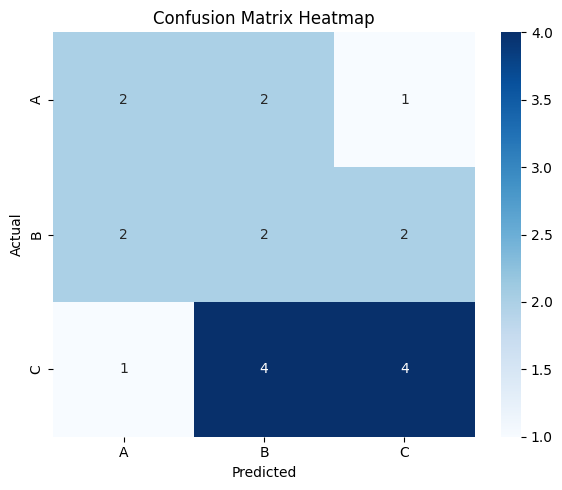

In [18]:
# Heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(
    cm, annot=True, fmt='d', cmap='Blues',
    xticklabels=le_emission.classes_,
    yticklabels=le_emission.classes_
)
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()